## Do 'Right-to-Work' laws contribute to a decline in union membership?

### I plan to source my data from the U.S. Bureau of Labor Statistics

In [2]:
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from bs4 import BeautifulSoup

For the first exercise I used the bureau of labor statistis API to download data for 8 states with recent data.

In [3]:
#alabama 2016 LUU0204899601, indiana 2012 LUU0204899618, michigan 2012 LUU0204899626, oklahoma 2001 LUU0204899640, west virginia 2016 LUU0204899654, wisconsin 2015 LUU0204899755
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LUU0204899601', 'LUU0204899618', 'LUU0204899640', 'LUU0204899626', 'LUU0204899654', 'LUU0204899755'],"startyear":"2000", "endyear":"2016","registrationkey":"5a861c23ca0146db94b32822ad9ea634"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

print (pd.DataFrame(json_data['Results']['series']))

                                                data       seriesID
0  [{'year': '2016', 'period': 'A01', 'periodName...  LUU0204899640
1  [{'year': '2016', 'period': 'A01', 'periodName...  LUU0204899654
2  [{'year': '2016', 'period': 'A01', 'periodName...  LUU0204899626
3  [{'year': '2016', 'period': 'A01', 'periodName...  LUU0204899618
4  [{'year': '2016', 'period': 'A01', 'periodName...  LUU0204899601
5  [{'year': '2016', 'period': 'A01', 'periodName...  LUU0204899755


In [4]:
alabama = pd.DataFrame(json_data['Results']['series'][4]['data'])
alabama = alabama[['value', 'year']].rename(index=str, columns={'value': 'alabama'})

indiana = pd.DataFrame(json_data['Results']['series'][3]['data'])
indiana = indiana[['value']].rename(index=str, columns={'value': 'indiana'})

michigan = pd.DataFrame(json_data['Results']['series'][2]['data'])
michigan = michigan[['value']].rename(index=str, columns={'value': 'michigan'})

oklahoma = pd.DataFrame(json_data['Results']['series'][0]['data'])
oklahoma = oklahoma[['value']].rename(index=str, columns={'value': 'oklahoma'})

wvirginia = pd.DataFrame(json_data['Results']['series'][1]['data'])
wvirginia = wvirginia[['value']].rename(index=str, columns={'value': 'wvirginia'})

wisconsin = pd.DataFrame(json_data['Results']['series'][5]['data'])
wisconsin = wisconsin[['value']].rename(index=str, columns={'value': 'wisconsin'})


frames = [alabama, indiana, michigan, oklahoma, wvirginia, wisconsin]

df = pd.concat(frames, axis=1)
# df.set_index('year', drop=True, inplace=True)
print (df)

   alabama  year indiana michigan oklahoma wvirginia wisconsin
0      8.1  2016    10.4     14.4      5.4      11.8       9.0
1     10.2  2015    10.0     15.2      5.6      12.4       9.4
2     10.8  2014    10.7     14.5      6.0      10.6      12.5
3     10.7  2013     9.3     16.3      7.5      12.7      13.1
4      9.2  2012     9.1     16.6      7.5      12.1      12.0
5     10.0  2011    11.3     17.5      6.4      13.8      14.1
6     10.1  2010    10.9     16.5      5.5      14.8      15.1
7     10.9  2009    10.6     18.8      5.7      13.9      15.8
8      9.8  2008    12.4     18.8      6.6      13.8      16.0
9      9.5  2007    12.0     19.5      7.1      13.3      15.4
10     8.8  2006    12.0     19.6      6.4      14.2      16.1
11    10.2  2005    12.4     20.5      5.4      14.4      17.2
12     9.7  2004    11.4     21.6      6.1      14.2      16.9
13     8.1  2003    11.8     21.9      6.8      13.1      16.8
14     9.1  2002    13.4     21.0      9.0      13.3   

In [5]:
df[['alabama', 'indiana', 'michigan', 'oklahoma', 'wvirginia', 'wisconsin']] = df[['alabama', 'indiana', 'michigan', 'oklahoma', 'wvirginia', 'wisconsin']].apply(pd.to_numeric)
df['mean'] = pd.to_numeric(df[['alabama', 'indiana', 'michigan', 'oklahoma', 'wvirginia', 'wisconsin']].mean(axis=1))
meandf = df[['year', 'mean']]
print(meandf)

    year       mean
0   2016   9.850000
1   2015  10.466667
2   2014  10.850000
3   2013  11.600000
4   2012  11.083333
5   2011  12.183333
6   2010  12.150000
7   2009  12.616667
8   2008  12.900000
9   2007  12.800000
10  2006  12.850000
11  2005  13.350000
12  2004  13.316667
13  2003  13.083333
14  2002  13.700000
15  2001  14.316667
16  2000  14.233333


C:\Users\maxim\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\maxim\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


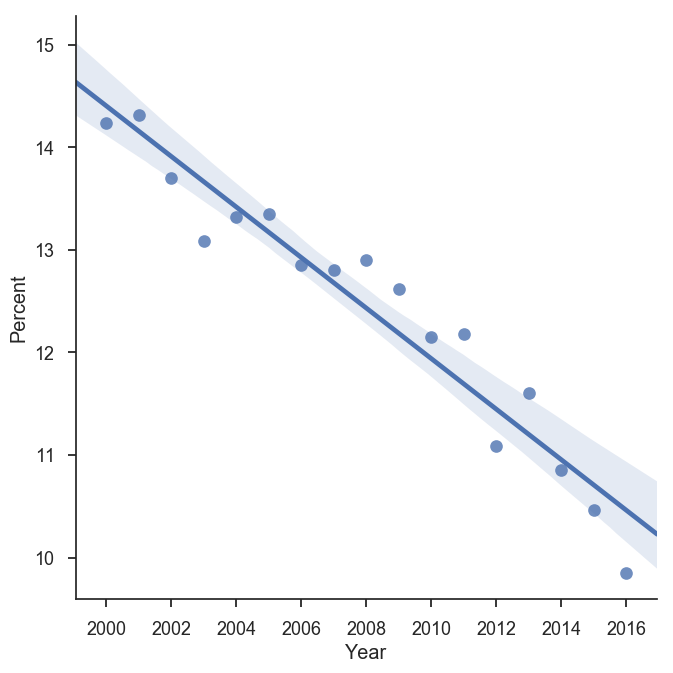

In [11]:
meandf.loc['year'] = pd.to_numeric(meandf['year'])

sns.set(style="ticks", context="talk")
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x="year", y="mean", data=meandf,
               palette=pal, size=7)
g.set_axis_labels("Year", "Percent")
sns.plt.show()

Alabama was relatively stable prioir to the law; give or take 1 point every year. It saw almost a 2 point drop in union membership the year the law was inacted (2016)

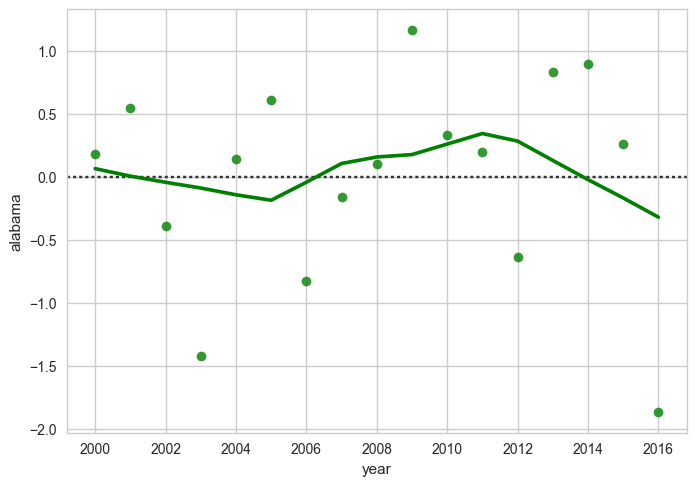

In [6]:
sns.set(style="whitegrid")
sns.residplot(pd.to_numeric(alabama['year']), pd.to_numeric(alabama['alabama']), lowess=True, color="g")
sns.plt.show()

Oklahoma actually saw an almost 2 point gain after the law was inacted in 2001

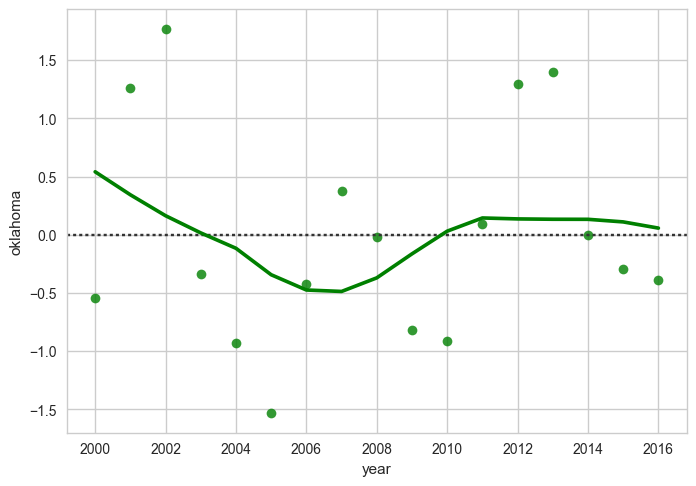

In [7]:
sns.residplot(pd.to_numeric(alabama['year']), pd.to_numeric(oklahoma['oklahoma']), lowess=True, color="g")
sns.plt.show()

For the next exercise I scraped a table containing the percentage of everyone employed, nationwide, that was a member of a union since 2006

In [10]:
page = requests.get('https://data.bls.gov/timeseries/LUU0204899700')
soup = BeautifulSoup(page.text, 'html.parser')

tables = soup.findAll("table", {"class": "regular-data"})
table = tables[1]


tdata = []
rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    tdata.append([ele for ele in cols if ele])
tdata = tdata[1:12]

tdata2 = []
for row in rows:
    cols = row.find_all('th')
    cols = [ele.text.strip() for ele in cols]
    tdata2.append([ele for ele in cols if ele])
tdata2 = tdata2[1:12]

In [13]:
zipped = list(zip(tdata2, tdata))
zdf = pd.DataFrame(zipped)
print(zdf)
zdf[0] = zdf[0].str[0]
zdf[1] = zdf[1].str[0]

         0       1
0   [2006]  [13.1]
1   [2007]  [13.3]
2   [2008]  [13.7]
3   [2009]  [13.6]
4   [2010]  [13.1]
5   [2011]  [13.0]
6   [2012]  [12.5]
7   [2013]  [12.4]
8   [2014]  [12.3]
9   [2015]  [12.3]
10  [2016]  [12.0]


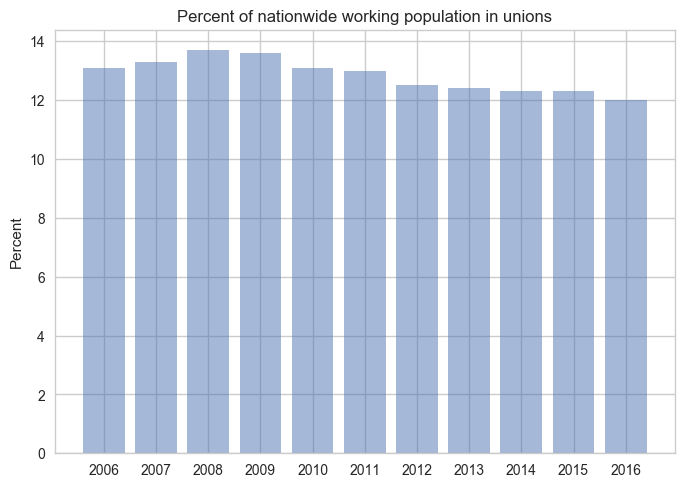

In [14]:
objects = zdf[0]
y_pos = np.arange(len(objects))
performance = pd.to_numeric(zdf[1])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percent')
plt.title('Percent of nationwide working population in unions')
 
plt.show()

We see a slow decline in membership since 2008. But this may due to the financial crisis that occured the same year and caused unemployment rates to go up. And cannot be attributed to the right-to-work laws.

### While we definitely see a steady decline nationwide, and state union membership levels are lower after the laws were inacted, I believe the available data is not enough to draw a conclusion.